
# EECS 469/569: Homework 1
## Serial Performance of Roaring Thunder
### Due: Sunday, Sep. 11 *before* midnight

### Instructions

This is a partner assignment (you should work together on all sections); if there are an odd number of students there can be exactly one group of three (or one group of one). The results of the homework should be compiled into the Jupyter notebook  called `hw1-submission-groupname.ipynb`, where `groupname` is replaced by your last name(s). The keyword **DELIVERABLE** indicates something that needs to be submitted. 

All source code, datasets, and plotting code required to run the Jupyter notebook must be included in your submission. All figures should be clear, with axes labeled, including a legend, and a caption. All figures should have a short description and referenced in text in the context of the assignment. **Only include files relevant to the assignment in your submission.** 

There are different methods to edit a Jupyter notebook:
* through [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) 
* local computer: you can either download it directly from [Project Jupyter](https://jupyter.org/), or it comes with the [Anaconda Python](https://www.anaconda.com/) distribution
* RoaringThunder: additional information will be sent

Formatting in a Jupyter notebook uses the [Markdown](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) style, and math can be written using LaTeX by using the '\\$' symbol. E.g., \\$ y = mx + b \\$ will look like $y=mx+b$. 

### Objectives
1. familiarize the student with the SDSU cluster environment and Unix command line;
2. recall writing, compiling, and running C code;
3. design, analyze, and optimize sequential linear algebra code; and
4. use the SLURM scheduler to run a cluster job.

You are required to work on all parts of the assignment with your partner. Do not have one person complete half of the assignment, and vice-versa; this defeats the purpose. 

**FINAL DELIVERABLE:** ***After*** you have completed the entire assignment, write a few paragraphs on your main takeaways from the assignment. **Clearly state** how the work was split up between you and your partner. 

# Procedure

## 1. Basic Unix Commands

This section will familizarize you with basix Unix commands to control the Roaring Thunder cluster using the command line. For a more comprehensive discussion on Unix commands, go through Chapter 21 in the HPC textbook or [work through this tutorial](https://users.cs.duke.edu/~alvy/courses/unixtut/). 

1. Using SSH, log onto the Roaring Thunder cluster  
`ssh username@rt.sdstate.edu`

After logging into the RT cluster, the command line will now accept Bash/Unix commands to navigate and execute software on the cluster. If you use a search engine for the keywords "Unix cheat sheet," you can find a pretty good list of commonly used commands to navigate using the command line. 

2. Execute the following Bash commands in order on the Roaring Thunder using the ssh command line:
```bash
pwd
man pwd %'spacebar' to page down, 'q' to quit
ls
ls -al
ls -a
ls -l
man head
mkdir eecs569
chmod 700 eecs569
cd eecs569
pwd
cd 
pwd
```

**1.1 DELIVERABLE:** Include a screenshot of your terminal after executing the Bash commands on the Roaring Thunder, and write a few sentences describing what the commands did. To edit a "cell" in a Jupyter notebook, double click on it to go into edit mode. To include an image, place the file in the same folder as your Jupyter notebook and use the following Markdown command:

`![Alt Text](filename.extension)`

After you are satisfied with your edits, click the "Run" button above (or use `SHIFT+ENTER`) to turn the Markdown language into formatted text. **All text must be formatted properly when the assignment is submitted.**



3. Make a directory inside your eecs592 folder for this homework assignment, and copy a file:
```bash
cd eecs569
mkdir hw1
cd hw1
cp /home/timothy.hansen/eecs569/homework/hw1/hw1.slurm hw1.slurm
ls -al
```

4. Use your favorite editor to construct the hello\_world code below and move to your `eecs569/hw1` folder. Alternatively you can copy it from [`hello_world.c`](../edit/hello_world.c) and move it to the cluster using an SFTP program (e.g., WinSCP), or directly from the command line of the Roaring Thunder cluster using `cp /home/timothy.hansen/eecs569/homework/hw1/hello_world.c hello_world.c`. 

```cpp
#include <stdio.h>

int main(int argc, char * argv[]){

	printf("hello world!\n");
	return 0;

}
```

5. Verify that the gcc compiler is loaded as a ***module***, and check which modules are available on the cluster

```bash
echo $PATH
module list
module avail
which gcc
```

If the gcc compiler is not loaded, use the `module load` command to add it to your path:

```bash
module load gcc
module list
echo $PATH
which gcc
```

6. Compile hello\_world.c using gcc and run the program (by default, C programs are compiled as "a.out" - if you want to change the filename use "-o newname")

```bash
gcc hello_world.c
./a.out
```

**1.2 DELIVERABLE:** Take a screenshot of the output of hello\_world and the files in your directory (use `ls -al`) and paste here. Write a couple sentences about modules and the gcc compiler.



## 2. Memory Input/Output (I/O) Performance

In this section, we will explore the capabilities of serial input and output of the Roaring Thunder parallel file system. Dr. Hansen will provide two C files that write random data to the cluster (and time it), and read that data from the cluster. You must have written a file first to read it. This section can be completed on the login node as it does not use many computational resources, rather is testing the shared file system resource.


### Roaring Thunder Write Performance

We will test the sequential write speed of the Roaring Thunder cluster in MB/s using [file_write.c](../edit/file_write.c). Compile the program using the following gcc command (if not running Jupyter on the cluster, remove '!' from the command - this tells Jupyter the code is for the command line and not Python):

In [ ]:
!gcc file_write.c -o fwrite -fopenmp -lm

Open the file and read through the C code. The program takes two required positional arguments, and one optional to save the data to a .csv file. The first argument is the filename of the data to be written. The second argument is the number of $\texttt{floats}$ to write to the file (where one $\texttt{float}$ is 4 Bytes). The last argument is an optional filename to save the performance data to a comma separated file (.csv) which will help you plot the data for your report.

Two example datasets are provided and plotted below. The first dataset (`fwrite.csv`) has one test from $10^2$ to $10^9$ Bytes, and the second (`fwrite_stats.csv`) runs 10 tests per filesize and plots the statistical variation of the filesystem performance. You may edit the test code to produce the results for your submission, or create your own Python plotting code.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#optional, load seaborn for nicer looking plots
import seaborn as sns
'''
This breaks for versions of seaborn < 0.11.0. Google Colab has latest version.
To install in Anaconda, use "conda install seaborn=0.11.2"
'''
sns.set_theme(style="whitegrid",context="poster") 

#load column headers into array
data = np.genfromtxt('fwrite.csv', delimiter=',', names=True)

#create figure
f,ax = plt.subplots()
ax.set(xscale='log',xlim=(0.00005,1500),ylabel='MB/s',xlabel='MB')
plt.plot(data['MB'],data['MBs'],marker='.')

ModuleNotFoundError: No module named 'matplotlib'

As can be seen above, the tests for MB/s vs. MB is quite noisy as the cluster disk drive is a shared resource. The next plot averages 10 tests and plots the statistical information of the cluster performance.

<AxesSubplot:xlabel='MB', ylabel='MB/s'>

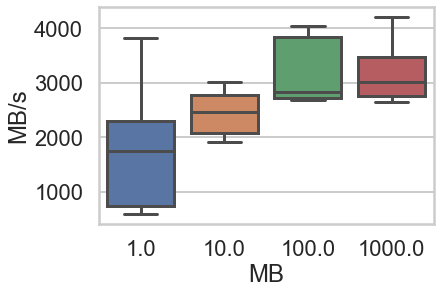

In [2]:
data = np.genfromtxt('fwrite_stats.csv', delimiter=',', names=True)

f,ax = plt.subplots()
ax.set(ylabel='MB/s',xlabel='MB')

sns.boxplot(x=data['MB'],y=data['MBs'])

One way to automate the creation of the dataset is using a Bash script for-loop, such as the one below. This is not required, and if it is confusing you may just manually create the datasets. More information on [bash for-loops can be found here.](https://www.cyberciti.biz/faq/bash-for-loop/) **Hint:** you can use bash scripts in your SLURM batch files. 

```bash
for N in 25 250 2500 #these will be appended to the filename and will set N floats to write
do
    for i in {1..10}
    do
        ./fwrite out$N.dat $N fwrite.csv
    done
done
```

Edit the numbers in the first list for the number of floats required for your deliverable, and the second sequence if you need more than 10 datapoints. **NOTE: Do not delete the out.dat files until after the next section as you will need them to test the read speed!**

**2.1 DELIVERABLE:** Test the write performance of the cluster by timing the output of writing $10^{-4}$ to $10^4$ MB. Plot your results using a statistical method (i.e., run multiple times per filesize, and plot the distributions). Discuss in one paragraph the write performance of the Roaring Thunder cluster and any key takeaways you notice. 

### Roaring Thunder Read Performance

We will test the sequential read speed of the Roaring Thunder cluster in MB/s using [file_read.c](../edit/file_read.c). Compile the program using the following gcc command:

In [ ]:
!gcc file_read.c -o fread -fopenmp -lm

**2.2 DELIVERABLE:** Test the read speed of the cluster by timing the read of the files you created in the previous section from $10^{-4}$ to $10^4$ MB. Plot your results using a statistical method (i.e., run multiple times per filesize, and plot the distributions). Discuss in one paragraph the write performance of the Roaring Thunder cluster and any key takeaways you notice. How does the read speed compare to the write speed?

**When you are done obtaining results, delete the data files as you will not need them anymore and to save resources on the shared Roaring Thunder cluster.** The easiest way to do this is to use the following command: `rm *.dat`, which will delete all files that end in the `.dat` extension. Only do this if you do not have other .dat files in the folder that you need.

## 3. Sequential Linear Algebra

This section will begin to examine the capabilities of the Roaring Thunder cluster. To accomplish this, a series of linear algebra operations will be timed and used to calculate the different performance metrics discussed in class (e.g., Flops). This is also a chance to refamiliarize yourself with C programming, dynamic memory allocation, and file input/output (I/O).

Unless debugging/developing your code, ⚠️⚠️**THE REST OF THE ASSIGNMENT NEEDS TO BE RUN ON DEDICATED RESOURCES OBTAINED THROUGH SLURM**⚠️⚠️

### SLURM Scheduler

All sections of this code should be completed on the Roaring Thunder cluster. Although test code can be run on the login node (e.g., compiling and verifying it works on small inputs), the actual results need to be obtained using dedicated resources obtained through the [SLURM scheduler.](https://slurm.schedmd.com/overview.html) SLURM is a method to allocate shared resources among multiple users and minimize the amount of time the cluster is idle. 

The Roaring Thunder has three queues for resources (type `sinfo` into the command line to see all resources):
1. compute 
2. bigmem
3. gpu
4. quickq

When you request resources from SLURM, it puts your request into a queue for scheduling. Once enough resources are available and it is your turn, your job is allocated to run. To see a list of all jobs running/waiting in line, type `squeue` into the command line. 

#### Batch Scheduling

From the Unix commands section, you should have an example SLURM batch scheduling file in your homework 1 folder (if not, copy it now). "Batch" scheduling just means that the job is submitted and you are free to continue using the cluster/command line before it is allocated/finished. This also means you can submit multiple batch jobs at once and they will all wait in the queue for resources. 

Open [`hw1.slurm`](../edit/hw1.slurm) and inspect the contents. The first line (`#!/bin/bash`) tells the scheduler that this is a Bash script (i.e., can execute any [Bash commands](https://opensource.com/article/19/10/programming-bash-syntax-tools) within the file). The next few lines tell the SLURM batch scheduler what types of resources are being asked for to run your job (`#SBATCH`). There are many more commands you can provide to SLURM, but these are all that are required most of the time. 

* `--job-name` : this is the name of the job that will be displayed by `squeue`. It should be descriptive of the job you are running.
* `--partition` : this is the queue you are using. Unless we are using the GPU nodes (later in the course), this will be either quickq or compute nodes. 
* `--nodes` : how many compute nodes that are required. For this assignment, we only need one node. 
* `--ntasks-per-node` : how many cores per node that are required (each compute node has 40 cores, quickq has 72). This is a sequential assignment, so only ask for 1. 
* `--time` : the **maximum** amount of time required by your job (if your program takes longer it will be interrupted). Format is DD:HH:MM:SS, maximum 7 days for compute nodes, 12 hours (12:00:00) for quickq. 

Everything after the `#SBATCH` commands are as if you typed them in order in the command line, except they will be automatically run on your dedicated resources allocated by SLURM. In general, load all modules required for your job, then run your program. **NOTE:** You can run more than one program in a batch job, for example if you are testing your linear algebra code for multiple matrix sizes you can make a for-loop in Bash. 

To submit your batch job, you will use the `sbatch` command. After submitting, you can check your job using `squeue -u username` to see all jobs you have submitted (replace "username" with your Roaring Thunder username). 

```bash
sbatch hw1.slurm
squeue -u timothy.hansen
```

#### Interactive Scheduling

The second way to use dedicated resources is ***interactively***. Instead of submitting a batch job using `sbatch`, you can ask for resources using `srun` and then waiting for them to become available. Once available, you can use the command line as if you were on the login node, except now you are on the dedicated resources requested. To accomplish this, use the following command:

`srun <resource flags> --pty bash`

The `<resource flags>` are the same as for the `#SBATCH` flags in the .slurm file. For example, can replicate the `hw1.slurm` request by typing:

`srun -N 1 -n 1 --time=1:00:00 --partition=quickq --pty bash`

In this case, `-N` is analagous to `--nodes`, and `-n` is analagous to `--ntasks-per-node`. 

### Matrix-Matrix Multiplication

We will examine the single processor performance of our cluster by performing and timing a series of matrix multiplications of increasing size, $N$, where each matrix is square $ N\times N $ in size, as follows:

$$
\mathbf{C}_{N\times N} = \mathbf{A}_{N\times N} \mathbf{B}_{N\times N} 
$$

where each element $c_{i,j} \in \mathbf{C}$ is calculated as:

$$
c_{i,j} = \sum_{k=0}^{N-1} a_{i,k} b_{k,j} \forall i,j = 0, \cdots, N-1
$$

The number of floating point operations (FLOP) for matrix multiply is $2N^3$, and the number of bytes per matrix (assuming singly precision floats) is $4N^2$. Thus a matrix multiply is order $\mathcal{O}(N^3)$. 

Copy [`matrix_multiply_naive.c`](../edit/matrix_multiply_naive.c) to your hw1 folder and compile `gcc matrix_multiply_naive.c -o matmul -lm -fopenmp`. Read through the C code so you understand what it is doing. The program takes one required positional argument and one optional. The first argument is the size of the matrices $N$. The second argument is an optional filename to save the performance data to a comma separated file (.csv) which will help you plot the data for your report.

**3.1 DELIVERABLE:** Using a dedicated node via SLURM, determine the execution time and Flops for the naive matrix matrix multiplication using $N=2^k$ with $k=6,...,12$. Plot (i) execution time (s) vs. N, and (ii) Flops vs. N. Average each size at least 5 times. Plot a statistical distribution of Flops for $N=2^{12}=4096$. Discuss the scaling of matrix-matrix product using the naive algorithm. 

#### Matrix-Matrix Algorithm Improvements

As discussed in class, the naive algorithm for matrix-matrix product does not make good use of data locality nor the memory hierarchy of the cluster. As a motivating example, run the following Python code and compare to your $N=1024$ performance:

In [1]:
import numpy as np
import time

N = 1024

A = np.random.uniform(size=(N,N))
B = np.random.uniform(size=(N,N))
C = np.zeros((N,N))

start = time.perf_counter()
C = A@B
end = time.perf_counter()

print(end-start)

0.24742109999999684


#### Compiler and Algorithm Optimizations

One of the main reasons why the performance of the naive matrix multiply is poor is because it does not take advantage of data locality. As such, it incurs ***cache-misses*** when the data it tries to operate is not in the L1 cache. The processor then has to sit idle until the data is retrieved to be used. One way to measure how often a cache miss occurs in a program is to use `perf`, which is a Linux tool to report on performance counters. More information is available here: [perf](https://sandsoftwaresound.net/perf/perf-tut-count-hw-events/). 

To measure the performance of your `matmul` program, you can use the following command: `perf stat -e cycles,instructions,cache-misses ./matmul [program options]`. This will report the number of CPU cycles, instructions executed, and cache misses. The longer the processor waits idle, the more CPU cycles it will take to execute the same number of instructions. 

1. The `gcc` compiler has built-in optimizations to make the same source code compile into a faster version (look up gcc optimization flags for more information). Try adding `-O3` compile flag to your `gcc` compilation and see the difference in performance: `gcc matrix_multiply_naive.c -o matmulo -O3 -lm -fopenmp`.
2. Make a copy of `matrix_multiply_naive.c` to `matrix_multiply_transpose.c`. **Within the timing section,** write code to transpose the B matrix. After the B matrix has been transposed, the matB indices in the `val +=` code need to be rearranged from $a_{ik}\times b_{kj}$ to  $a_{ik}\times b_{jk}$.
3. Make a copy of `matrix_multiply_naive.c` to `matrix_multiply_looporder.c`. Rearrange the loop order as shown in class to better re-use the B matrix (you may need to adjust your C matrix element load/store as it is no longer calculated completely in the inner-loop). 
4. Make a copy of `matrix_multiply_naive.c` to `matrix_multiply_blocking.c`. Research blocking and tiling algorithms for matrix multiplication. Add another command line argument (and output column) for the *block size* $T$. Adjust your matrix multiply code to add inner-loops of the block size. 

Validate that you obtain the same result in each version (one way to do this is to set the same srand seed and print out the same index for the calculated C matrix). 

**3.2.1 DELIVERABLE** Using a dedicated node via SLURM, for $N=2^{12}=4096$, create a plot of Flops versus block size ($T= 2,4,8,16,32,64,128$) for the `matrix_multiply_blocking.c` code. What is the impact of block size on performance? 

**3.2.2 DELIVERABLE:** Using a dedicated node via SLURM, for $N=2^{12}=4096$ create a statistical plot that compares (i) the Flops (use a proper SI prefix, such as GFlops) and (ii) execution time between the naive method (you should already have these numbers) and the four new adjustments. Properly label each algorithm. Discuss the impact of each matrix multiply method.

**3.2.3 DELIVERABLE:** Report in a markdown table the cache-misses and instructions per cycle between the five versions of the algorithm. You only need to report these for one run per algorithm. How do they compare and correlate with the timing information above?

### Comparison of Different Linear Algebra Algorithms

In the prior section we explored matrix-matrix multiply, which is an $N^3$ algorithm on $N^2$ data. In this section, you will explore the scalability of the dot product ($N$ operations on $N$ data) and the matrix-vector product ($N^2$ operations on $N^2$ data). 

The dot product operates on two $N$ sized vectors $\mathbf{a}$ and $\mathbf{b}$ to calculate a scalar $c$. The number of floating point operations (FLOP) for the dot product is $2N-1$ (i.e., order of $\mathcal{O}(N)$), and the number of bytes per vector (assuming single precision floats) is $4N$. The scalar $c$ is calculated as:

$$
c = \mathbf{a^T}_{1\times N} \cdot \mathbf{b}_{N\times 1} = \sum_{i=0}^{N-1} a_{i} b_{i}
$$

The matrix-vector product operates on an $N\times N$ matrix $\mathbf{A}$ and $N \times 1$ vector $\mathbf{b}$ to calculate a $N \times 1$ vector $\mathbf{c}$. The number of floating point operations (FLOP) for the matrix-vector product is $2N^2-N$ (i.e., order of $\mathcal{O}(N^2)$), and the number of bytes per matrix (assuming single precision floats) is $4N^2$ (the vector is size $4N$). The output $\mathbf{c}$ is calculated as:

$$
\mathbf{c}_{N\times 1} = \mathbf{A}_{N\times N} \mathbf{b}_{N\times 1},
$$

where each element $c_{i} \in \mathbf{c}$ is calculated as:

$$
c_{i} = \sum_{j=0}^{N-1} a_{i,j} b_{j} \forall i = 0, \cdots, N-1.
$$

Create a copy of and modify your matrix multiplication code (naive) to create a dot product and matrix-vector product C program. Remember you will need to modify the calculation of # FLOP as the algorithms scale differently. 

**3.3.1 DELIVERABLE:** On a dedicated SLURM node, using the same $N$ as the matrix multiply section, plot (i) execution time (s) vs. N, and (ii) Flops vs. N for the two algorithms. 

**3.3.2 DELIVERABLE:** Create a plot that compares the execution time of matrix-matrix, matrix-vector, and dot products. Validate that the algorithms scale linearly, quadratically, and cubicly. You may need to have a second plot with a scaled Y-axis to see all three plots clearly. Try to fit a linear, quadratic, and cubic polynomial to the three datasets. 

# APPENDIX

If you need help learning the basics of Python plotting, it is suggested you read through and do some examples from the following:

* [matplotlib](https://matplotlib.org/stable/tutorials/index.html)
* [seaborn](https://seaborn.pydata.org/tutorial.html)
* [numpy](https://numpy.org/doc/stable/user/quickstart.html)
* [pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
* [scipy](https://scipy-lectures.org/)


## Plotting in Jupyter

Two alternatives to the seaborn script (in case you do not have access to seaborn > v11.0) are provided below. This gives some additional plotting examples you may use/edit.

### Using Pyplot

Instead of using seaborn for plotting commands, matplotlib.pyplot also provides the same functionality (just with usually poorer looking plots - still better looking than Excel!).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt('fwrite_stats.csv', delimiter=',', names=True)

#need to split into multiple arrays based on x-axis label (i.e., MB)
labels = np.unique(data['MB']) #gets the unique labels
data_dist = []

for mb in labels:
    indices = np.where(data['MB']==mb) #get list of indices for each MB amount
    data_dist.append(data['MBs'][indices]) #slice data out matching index

#plotting code once data is formatted
plt.figure()

plt.xlabel('MB')
plt.ylabel('MB/s')

plt.boxplot(data_dist, labels=labels)

plt.savefig('test.png')

plt.show()

### Embedding Images into Jupyter

If you run the pyplot code above, it will save a figure called "test.png". You can then embed a figure in a notebook by:

![This is the figure alt text.](test.png)

### Using older version of Seaborn (< 0.11.0)
The following uses the older API for seaborn to make the same plot. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('poster')

data = np.genfromtxt('fwrite_stats.csv', delimiter=',', names=True)

f,ax = plt.subplots()
ax.set(ylabel='MB/s',xlabel='MB')

sns.boxplot(x=data['MB'],y=data['MBs'])